# Daten importieren


In [22]:
import pandas as pd

df = pd.read_csv("supermarket_data.csv", parse_dates=["Date"], index_col="Date")
df = df.asfreq('D')
df

,Number of clients
Date,
2023-01-01,0
2023-01-02,6
2023-01-03,12
2023-01-04,0
2023-01-05,27
...,...
2023-12-27,346
2023-12-28,372
2023-12-29,333


# Daten visualisieren

<Axes: xlabel='Date', ylabel='Number of clients'>

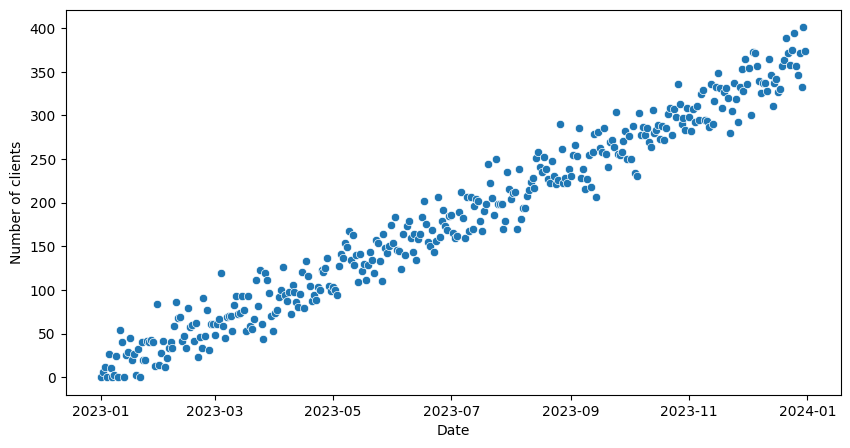

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.scatterplot(x=df.index, y=df["Number of clients"])

# Feature generieren

In [24]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(index=df.index, order=1)

X = dp.in_sample()
X

,trend
Date,
2023-01-01,1.0
2023-01-02,2.0
2023-01-03,3.0
2023-01-04,4.0
2023-01-05,5.0
...,...
2023-12-27,361.0
2023-12-28,362.0
2023-12-29,363.0


In [25]:
y = df["Number of clients"]
y

Date
2023-01-01      0
2023-01-02      6
2023-01-03     12
2023-01-04      0
2023-01-05     27
             ... 
2023-12-27    346
2023-12-28    372
2023-12-29    333
2023-12-30    401
2023-12-31    374
Freq: D, Name: Number of clients, Length: 365, dtype: int64

# Daten aufteilen

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False)

In [27]:
X_train

,trend
Date,
2023-01-01,1.0
2023-01-02,2.0
2023-01-03,3.0
2023-01-04,4.0
2023-01-05,5.0
...,...
2023-10-15,288.0
2023-10-16,289.0
2023-10-17,290.0


In [28]:
X_test

,trend
Date,
2023-10-20,293.0
2023-10-21,294.0
2023-10-22,295.0
2023-10-23,296.0
2023-10-24,297.0
...,...
2023-12-27,361.0
2023-12-28,362.0
2023-12-29,363.0


# Modell trainieren

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Modell visualisieren

In [31]:
train_predictions = model.predict(X_train)

<Axes: xlabel='Date', ylabel='Number of clients'>

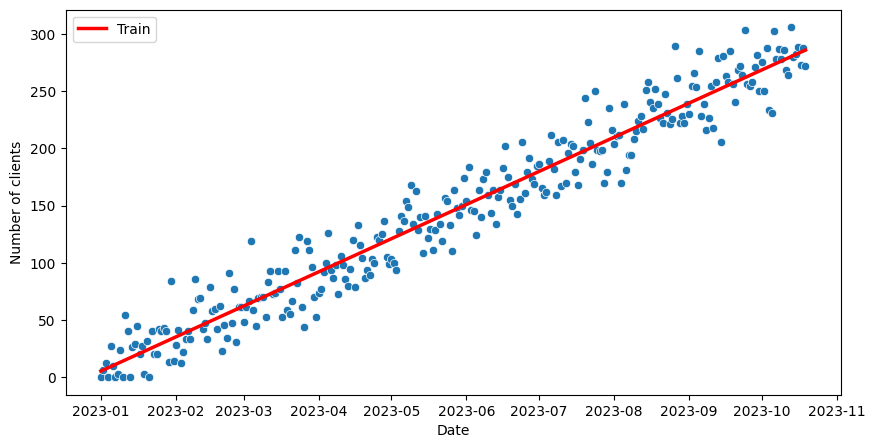

In [32]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=X_train.index, y=y_train)
sns.lineplot(x=X_train.index, y=train_predictions, color="red", linewidth=2.5, label="Train")

# Vorhersage auf den Testdaten

In [33]:
X_test

,trend
Date,
2023-10-20,293.0
2023-10-21,294.0
2023-10-22,295.0
2023-10-23,296.0
2023-10-24,297.0
...,...
2023-12-27,361.0
2023-12-28,362.0
2023-12-29,363.0


In [34]:
test_predictions = model.predict(X_test)

# Modellbewertung (Mean Absolute Error)

In [35]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_predictions, y_test)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 16.759905712640656


<Axes: xlabel='Date', ylabel='Number of clients'>

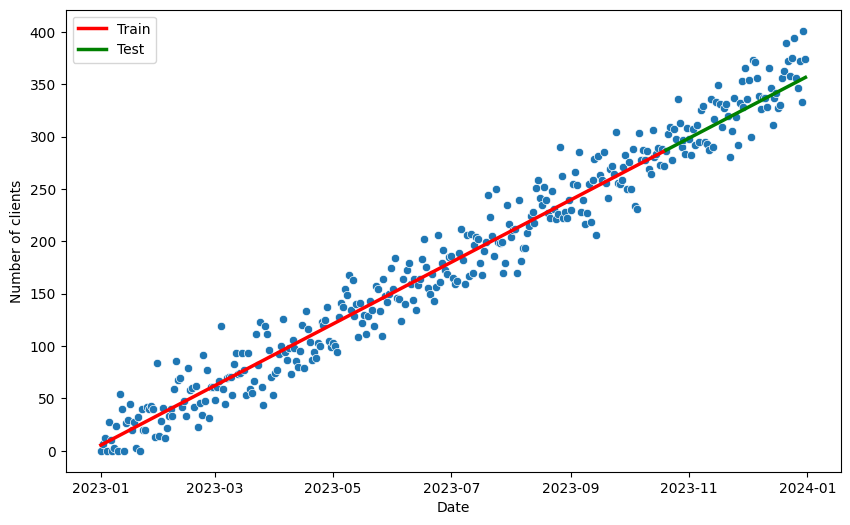

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df["Number of clients"])
sns.lineplot(x=X_train.index, y=train_predictions, color="red", linewidth=2.5, label="Train")
sns.lineplot(x=X_test.index, y=test_predictions, color="green", linewidth=2.5, label="Test")

# Prognosen für das nächste Jahr:

In [37]:
X_forecast = dp.out_of_sample(steps=365)
X_forecast

,trend
2024-01-01,366.0
2024-01-02,367.0
2024-01-03,368.0
2024-01-04,369.0
2024-01-05,370.0
...,...
2024-12-26,726.0
2024-12-27,727.0
2024-12-28,728.0
2024-12-29,729.0


In [38]:
forecast_predictions = model.predict(X_forecast)

<Axes: xlabel='Date', ylabel='Number of clients'>

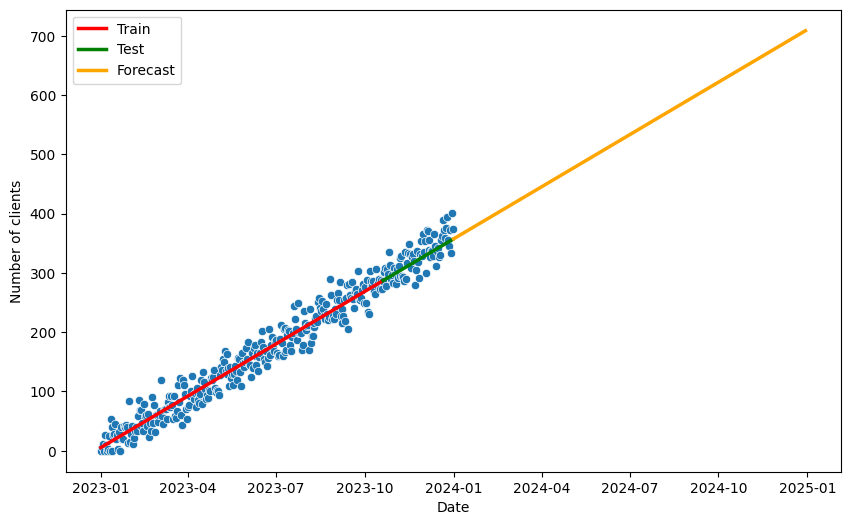

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df["Number of clients"])
sns.lineplot(x=X_train.index, y=train_predictions, color="red", linewidth=2.5, label="Train")
sns.lineplot(x=X_test.index, y=test_predictions, color="green", linewidth=2.5, label="Test")
sns.lineplot(x=X_forecast.index, y=forecast_predictions, color="orange", linewidth=2.5, label="Forecast")